#### import libraries

In [36]:
import numpy as np
from typing import Tuple, Dict

#### generating data for our xnor problem

In [37]:
def generate_data(N: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Original code credits to Prof. Dr. Stefan Harmeling
    
    Generate a data for training our linear model.
    :param N: number of samples multiplier.
    :return: tuple of x and y data as numpy ndarrays.
    """
    X = np.repeat(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), N, axis=0)
    X = X + np.random.randn(4 * N, 2) * 0.2
    y = np.repeat([0, 1, 1, 0], N)
    y = np.reshape(y, (len(y), 1))

    return X, y

In [38]:
X_train, y_train = generate_data(N=100)
X_test, y_test = generate_data(N=50)

#### extra code
to plot the data we just created

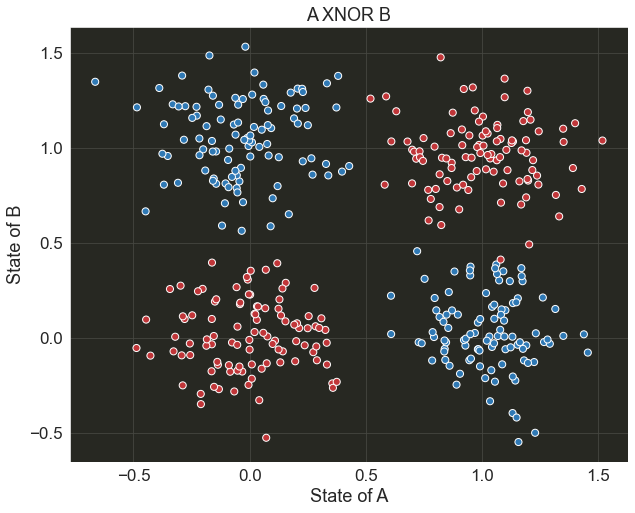

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams.update({"savefig.facecolor": (0.0, 0.0, 0.0, 0.0),})

plt.figure(figsize=(20, 15))
plt.grid(color="#474842")

plt.xticks(np.arange(-.5, 1.51, .5), fontsize=17)
plt.yticks(np.arange(-.5, 1.51, .5), fontsize=17)

ax = plt.gca()
ax.set_facecolor("#272822")

plt.title("A XNOR B", fontsize=18)
plt.xlabel("State of A", fontsize=18)
plt.ylabel("State of B", fontsize=18)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.savefig("xnor_problem.svg")
plt.show()

#### define non-linear and loss function as well as their derivatives

In [40]:
def sigmoid(X: np.ndarray) -> np.ndarray:
    """
    The sigmoid function will return 0 for every x << 0 and 1 for every x >> 0.
    :param X: data to transform via sigmoid function:
    :return: transformed data that lies between 0 and 1.
    """
    return 1 / (1 + np.exp(-X))

In [41]:
def sigmoid_derivative(X: np.ndarray) -> np.ndarray:
    """
    The derivative of the sigmoid function.
    :param X: the data points for that the slope of the sigmoid function should be returned.
    :return: the slope of the sigmoid function at every given X.
    """
    sig = sigmoid(X)
    return sig * (1 - sig)

In [42]:
def cross_entropy_loss(
    h: np.ndarray, y: np.ndarray
) -> np.ndarray:
    """
    Compute the cross entropy loss for the given hypothesis (h) in contrast to the true results (y).
    :param h: Hypothesis of the NN to compare with y.
    :param y: True results of the data.
    :return: Cost/Loss of the current hypothesis.
    """
    return -(1/y.size) * ((y.T @ np.log(h)) + ((1 - y.T) @ np.log(1 - h)))

In [43]:
def cross_entropy_derivative(
    h: np.ndarray, y: np.ndarray
) -> np.ndarray:
    """
    Compute the derivative of the cross entropy loss.
    :param h: Hypothesis of the NN to compare with y.
    :param y: True results of the data.
    :return: Derivative of the cross entropy loss with the current hypothesis.
    """
    return -(y // h) + ((1 - y) // (1 - h))

#### putting the initialization and the backprop algorithm together

In [44]:
def fit(X: np.ndarray, y: np.ndarray) -> Tuple[Dict, Dict]:
    """
    Create a simple ANN and train it on the given binary classification data.
    :param X: Input data.
    :param y: Output data.
    :return: Weights and biases as dictionaries.
    """
    weights = dict()
    biases = dict()

    weights[1] = 2 * np.random.random((2,3)) - 1
    biases[1] = np.zeros(3)
    weights[2] = 2 * np.random.random((3,1)) - 1
    biases[2] = np.zeros(1)

    a = dict()
    z = dict()
    da = dict()
    dz = dict()

    for iteration in range(1000):
        z[1] = X @ weights[1] + biases[1]
        a[1] = sigmoid(z[1])
        z[2] = a[1] @ weights[2] + biases[2]
        a[2] = sigmoid(z[2])
        h = a[2]

        loss = cross_entropy_loss(h=h, y=y)
        print(f"Loss ({iteration}): {loss[0][0]}")

        da[2] = cross_entropy_derivative(h=h, y=y)
        dz[2] = da[2] * sigmoid_derivative(z[2])
        da[1] = dz[2] @ weights[2].T
        dz[1] = da[1] * sigmoid_derivative(z[1])

        weights[1] -= (X.T @ dz[1]) * (1 / y.size)
        biases[1] -= np.mean(dz[1], axis=0)

        weights[2] -= (a[1].T @ dz[2]) * (1 / y.size)
        biases[2] -= np.mean(dz[2], axis=0)

    return weights, biases

#### run the training

In [48]:
w, b = fit(X=X_train, y=y_train)

Loss (0): 0.7310704505550926
Loss (1): 0.7051390844573031
Loss (2): 0.6916087971636146
Loss (3): 0.6924302728128402
Loss (4): 0.6915900122829058
Loss (5): 0.6921558666808821
Loss (6): 0.6915792705203643
Loss (7): 0.6918769555425334
Loss (8): 0.6915771874756104
Loss (9): 0.6915938173124515
Loss (10): 0.691584428656217
Loss (11): 0.6913067734783563
Loss (12): 0.6916017115817121
Loss (13): 0.6910161919553574
Loss (14): 0.6916298078607932
Loss (15): 0.6907224900500767
Loss (16): 0.6916695452111457
Loss (17): 0.6904261375192701
Loss (18): 0.6917218093856172
Loss (19): 0.690127659703111
Loss (20): 0.6917875459621431
Loss (21): 0.6898276407079951
Loss (22): 0.6918677619476423
Loss (23): 0.6895267266075399
Loss (24): 0.6919635271380734
Loss (25): 0.6892256286232853
Loss (26): 0.6920759751678989
Loss (27): 0.6889251262383809
Loss (28): 0.6922063041723271
Loss (29): 0.6886260701881194
Loss (30): 0.692355776974848
Loss (31): 0.6883293852605104
Loss (32): 0.6922981354534439
Loss (33): 0.6880991279

Loss (290): 0.4307514713239647
Loss (291): 0.4284164885404032
Loss (292): 0.42608260842542117
Loss (293): 0.42375026638886587
Loss (294): 0.4214198837700709
Loss (295): 0.4190918689392037
Loss (296): 0.4167666183305469
Loss (297): 0.41444451737837185
Loss (298): 0.4121259413422554
Loss (299): 0.4098112560192948
Loss (300): 0.40750081834733887
Loss (301): 0.4051949769072739
Loss (302): 0.40289407233443736
Loss (303): 0.4005984376500193
Loss (304): 0.39830839852328825
Loss (305): 0.3960242734749495
Loss (306): 0.39374637403114
Loss (307): 0.39147500483661624
Loss (308): 0.38921046373470475
Loss (309): 0.38695304182061685
Loss (310): 0.38470302347381796
Loss (311): 0.3824732633490156
Loss (312): 0.38023673920680023
Loss (313): 0.37802150447622035
Loss (314): 0.37581317558505334
Loss (315): 0.3736121786423681
Loss (316): 0.37141895099392086
Loss (317): 0.3692339179458387
Loss (318): 0.36705748108987146
Loss (319): 0.3649054380890307
Loss (320): 0.3627608890858313
Loss (321): 0.360607745052

Loss (572): 0.12953143998718644
Loss (573): 0.12925498712949102
Loss (574): 0.12898803688429028
Loss (575): 0.1287150612286571
Loss (576): 0.12845159960745262
Loss (577): 0.1281820571764809
Loss (578): 0.12792202460611024
Loss (579): 0.12765586783953164
Loss (580): 0.1273992047376834
Loss (581): 0.12713638373332864
Loss (582): 0.12688303083573468
Loss (583): 0.12663107152976644
Loss (584): 0.12637261421329712
Loss (585): 0.12612394334130347
Loss (586): 0.12586716863710365
Loss (587): 0.12562018778767706
Loss (588): 0.12537469553192807
Loss (589): 0.12513068382738426
Loss (590): 0.12488814423600979
Loss (591): 0.12464706795237994
Loss (592): 0.12440744584014145
Loss (593): 0.12416926847200982
Loss (594): 0.1239325261702504
Loss (595): 0.1236972090457517
Loss (596): 0.12346330703459327
Loss (597): 0.12323080993153955
Loss (598): 0.12299970742024094
Loss (599): 0.12276998910014536
Loss (600): 0.12254164451026019
Loss (601): 0.12231466314998145
Loss (602): 0.12208903449724648
Loss (603): 0

Loss (871): 0.08852852916257657
Loss (872): 0.08845878725784723
Loss (873): 0.08839507446233479
Loss (874): 0.08831992736149712
Loss (875): 0.0882506123057418
Loss (876): 0.08818753497685641
Loss (877): 0.08810851681519469
Loss (878): 0.08804569253660834
Loss (879): 0.08797841538989656
Loss (880): 0.08791129503116701
Loss (881): 0.08784911359590993
Loss (882): 0.08777620755333558
Loss (883): 0.08770947608674924
Loss (884): 0.08764291124908226
Loss (885): 0.08757651299695446
Loss (886): 0.08751028134013918
Loss (887): 0.08743854793147313
Loss (888): 0.0873833978462744
Loss (889): 0.08731117434025737
Loss (890): 0.08724552608257118
Loss (891): 0.08718005291773961
Loss (892): 0.08710899806461775
Loss (893): 0.08705470314495141
Loss (894): 0.08698318440413709
Loss (895): 0.08692440687361412
Loss (896): 0.0868531933884356
Loss (897): 0.08679488037484517
Loss (898): 0.08672397062035221
Loss (899): 0.08667099001955482
Loss (900): 0.0865996954841161
Loss (901): 0.08652951398915416
Loss (902): 

#### function to make predictions on trained neural network

In [49]:
def predict(w: Dict, b: Dict, X: np.ndarray) -> np.ndarray:
    """
    Use the given weights (w) and biases (b) to make a prediction for the given input data (X).
    :param w: Dictionary of weight matrices.
    :param b: Dictionary of bias vectors.
    :param X: Input data to make predictions on.
    :return: An numpy array of predictions for every sample in X.
    """
    z = dict()
    a = dict()
    
    z[1] = X @ w[1] + b[1]
    a[1] = sigmoid(z[1])
    z[2] = a[1] @ w[2] + b[2]
    a[2] = sigmoid(z[2])
    
    return a[2]

#### extra code
Create a grid over X- and Y-axis and make a prediction for each spot. visualize the result

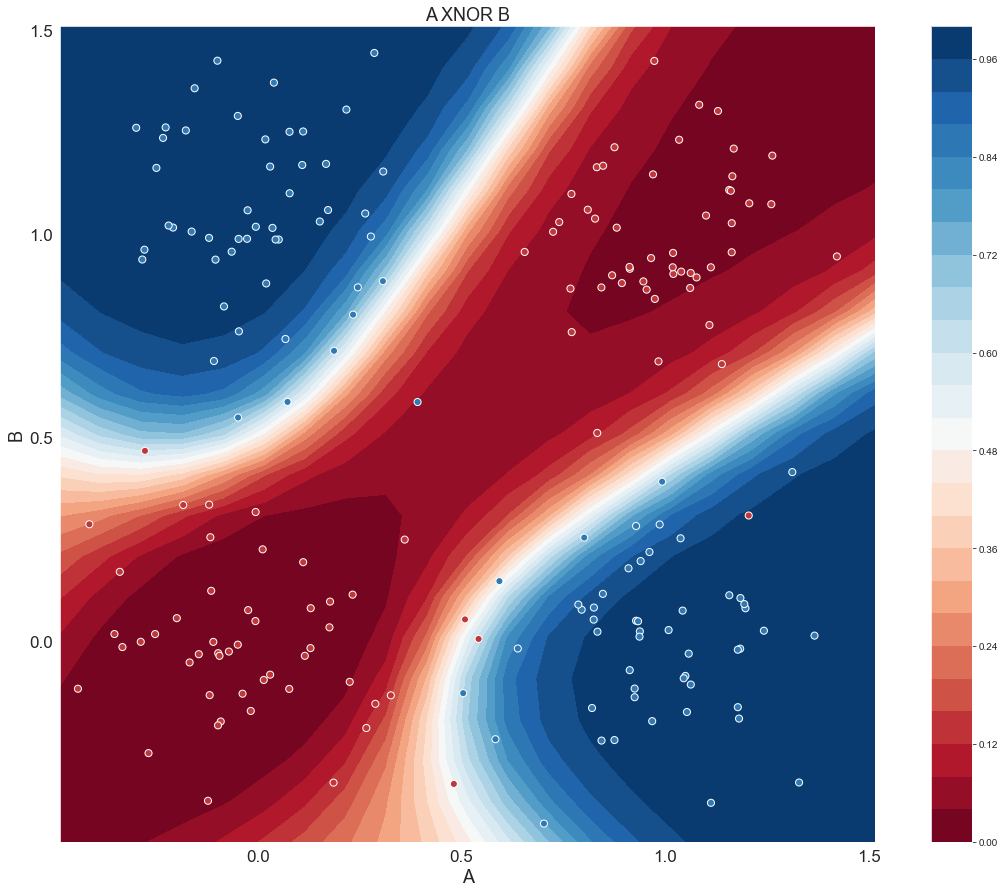

In [50]:
X = X_test

xx, yy = np.mgrid[1.1*min(X[:,0]):1.1*max(X[:,0]):0.1, 1.1*min(X[:,1]):1.1*max(X[:,1]):0.1]

grid = np.c_[xx.ravel(), yy.ravel()]

# Find the probabilities for each combination of features

probs = predict(w, b, grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(20, 15))

# Create contour lines for each set of probabilities

contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

plt.xticks(np.arange(-.5, 1.51, .5), fontsize=17)
plt.yticks(np.arange(-.5, 1.51, .5), fontsize=17)

plt.title("A XNOR B", fontsize=18)
plt.xlabel("A", fontsize=18)
plt.ylabel("B", fontsize=18)

ax_c = f.colorbar(contour)

ax.scatter(X_test[:,0], X_test[:, 1], c=y_test[:,0], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal")

plt.savefig("xnor_decision_boundaries.svg")
plt.show()